In [1]:
#Q5.1
import os
import re
import numpy as np

In [2]:
with open('dic.dat', 'r') as file:
    data = file.read()
dictionary =  data.split()  

In [3]:
path_ham = './train/ham'
matrix = []

pattern = r'[ \t\n.,?]+'
files = os.listdir(path_ham)
for file in files:
    with open(os.path.join(path_ham, file), "r", encoding='ISO-8859-1') as f:
        content = f.read()
        result = re.split(pattern, content)
        x_i = np.zeros(len(dictionary))
        for word in result:
            if word.lower() in dictionary:
                index = dictionary.index(word)
                x_i[index]+=1
        matrix.append(x_i)
        
row_ham = len(matrix)
# do the same for spam
        
path_spam = './train/spam'
files = os.listdir(path_spam)
for file in files:
    with open(os.path.join(path_spam, file), "r", encoding='ISO-8859-1') as f:
        content = f.read()
        result = re.split(pattern, content)
        x_i = np.zeros(len(dictionary))
        for word in result:            
            if word.lower() in dictionary:
                index = dictionary.index(word)
                x_i[index]+=1
        matrix.append(x_i)
      
    
row_spam = len(matrix)-row_ham
X = np.array(matrix)

# spam is 1 ham is 0

zeros = np.zeros(row_ham, dtype=int)
ones = np.ones(row_spam, dtype=int)
y = np.concatenate((zeros, ones))

# row is instance(email), col is feature ( cnt of word in dict)
# matrix dim: num emails = 341 by d =len(dictionary)= 1024

In [4]:
row_ham

341

In [5]:
row_spam

123

In [6]:
count_col = np.sum(X, axis =0)
descending_cnt_idx = np.argsort(count_col)[::-1]

In [7]:
#Q5.2
num_occurances = count_col[descending_cnt_idx[:3]]
top_words = [dictionary[i] for i in descending_cnt_idx[:3]]


word_frequency_pairs = zip(top_words, num_occurances)
formatted_pairs = [f'({word}: {count})' for word, count in word_frequency_pairs]
result_string = "{" + ", ".join(formatted_pairs) + "}"
print(result_string)

{(enron: 600.0), (will: 351.0), (please: 291.0)}


In [8]:
#Q 5.3
import math

In [9]:
n = X.shape[0] # num of all emails
d = X.shape[1] # num of words in dictionary
w = np.zeros(d)
b = 0.1
num_inter = 51
step_size = 0.01
lamb = 0.01
################################ 
loss_lst =[]
# loss = 0

def sigmoid(p):
    return 1/(1 + np.exp(-p))


gradient = np.zeros_like(w)
for iteration in range(num_inter):
    loss = 0
    gradient = np.zeros_like(w)
    gradient_b = 0
    # Calculate loss and gradient
    for i in range(n):
        prediction = sigmoid(np.dot(X[i,:], w) + b)
        prediction_2 = 1- prediction
        # Handling numerical stability
        if prediction < 1e-16:
            prediction = 1e-16
        if prediction_2<1e-16:
            prediction_2 = 1e-16
            
        loss -= y[i] * np.log(prediction) + (1 - y[i]) * np.log(prediction_2)
        gradient += X[i, :] * (prediction - y[i])
        gradient_b += prediction - y[i] 
    
    # Regularization
    loss += lamb * math.sqrt(np.dot(w, w))
    gradient = gradient + lamb * w
    # Update weights and bias
    w = w - step_size * gradient
    b = b - step_size * gradient_b  
    # Append to the loss list
    loss_lst.append(loss)  # average loss
loss_lst

[333.10005027413877,
 301.96193898624097,
 76.30342601475948,
 66.67195617680521,
 61.48601225995933,
 57.771647087276754,
 54.83792889420242,
 52.40009089262723,
 50.311975865925604,
 48.48663894310602,
 46.86706025631939,
 45.41336762092566,
 44.09640762071445,
 42.89414699195617,
 41.78949683846997,
 40.76892071384818,
 39.821505323055575,
 38.938318892214134,
 38.11195582665121,
 37.33620599123595,
 36.60580963170034,
 35.916272512951,
 35.2637242547465,
 34.64480821415519,
 34.056594781748025,
 33.496512313403805,
 32.96229152638752,
 32.451920303528965,
 31.963606635441046,
 31.49574799294095,
 31.046905829423466,
 30.61578421221068,
 30.20121180431922,
 29.802126585267708,
 29.41756282656807,
 29.04663993502204,
 28.688552852458077,
 28.342563759556494,
 28.007994877905215,
 27.684222201340237,
 27.370670017135918,
 27.066806101359866,
 26.77213749193875,
 26.486206758640904,
 26.208588702006082,
 25.938887423803195,
 25.676733720320627,
 25.421782757039676,
 25.173711989284186,

In [10]:
np.log((1/(10**(-16))-1))

36.841361487904734

In [11]:
a = 1000
a = np.clip(a,1,100)
a

100

In [12]:
#Q5.4a


In [13]:
# no regularization
def sigmoid(p):
    p = np.clip(p, -200, 200)
    return 1/(1 + np.exp(-p))
    

def no_regularization(iterat,w,X,b,step_size):    
    loss_lst = []
    for _ in range(iterat):
        loss = 0
        gradient = np.zeros_like(w)
        gradient_b = 0
        # Calculate loss and gradient
        for i in range(n):
            prediction = sigmoid(np.dot(X[i,:], w) + b)
            prediction_2 = 1- prediction
            # Handling numerical stability
            if prediction < 1e-16:
                prediction = 1e-16
            if prediction_2<1e-16:
                prediction_2 = 1e-16

            loss -= y[i] * np.log(prediction) + (1 - y[i]) * np.log(prediction_2)
            gradient += X[i, :] * (prediction - y[i])
            gradient_b += prediction - y[i] 

        # Update weights and bias
        w = w - step_size * gradient
        b = b - step_size * gradient_b  
        # Append to the loss list
        loss_lst.append(loss)  # average loss
    return loss_lst, w.T@w

def with_regularization(iterat,w,X,b,step_size,lamb):
    loss_lst = []
    for _ in range(iterat):
        loss = 0
        gradient = np.zeros_like(w)
        gradient_b = 0
        # Calculate loss and gradient
        for i in range(n):
            prediction = sigmoid(np.dot(X[i,:], w) + b)
            prediction_2 = 1- prediction
            # Handling numerical stability
            if prediction < 1e-16:
                prediction = 1e-16
            if prediction_2<1e-16:
                prediction_2 = 1e-16

            loss -= y[i] * np.log(prediction) + (1 - y[i]) * np.log(prediction_2)
            gradient += X[i, :] * (prediction - y[i]) 
            gradient_b += prediction - y[i] 
            
            
         # Regularization
        loss += lamb * math.sqrt(np.dot(w, w))
        gradient = gradient + 2* lamb * w
        gradient_b= gradient_b
        # Update weights and bias
        w = w - step_size * gradient
        b = b - step_size * gradient_b  
        # Append to the loss list
        loss_lst.append(loss)  # average loss
    return loss_lst, w.T@w


    
    
w = np.zeros(d)
b = 0.1
num_inter = 51
step_size = 0.01
lamb = 0.001
################################ 
no_reg,_ = no_regularization(num_inter,w,X,b,step_size)
reg, _= with_regularization(num_inter,w,X,b,step_size,lamb)
print(no_reg)
print(" ")
print(reg)


[333.10005027413877, 301.9074905833933, 76.24826623242183, 66.6113042074164, 61.42153540416926, 57.70371092207476, 54.76678431962153, 52.32593010822102, 50.23495283921759, 48.40688170161092, 46.78467814299465, 45.3284558809849, 44.00905050653344, 42.80441997123348, 41.697468217487966, 40.67465285774437, 39.72505558829256, 38.839740349056356, 38.011297826591516, 37.23351461919335, 36.501128072212595, 35.8096413518718, 35.15518173224131, 34.53439044052977, 33.94433592448606, 33.38244476146971, 32.846446036170754, 32.334326129605856, 31.84429164848662, 31.374738786536827, 30.924227817104445, 30.49146171581831, 30.075268134538764, 29.674584115094074, 29.288443058351017, 28.915963561668594, 28.556339813315628, 28.208833291451494, 27.872765561773353, 27.54751200484602, 27.23249633364753, 26.927185785613123, 26.631086892695, 26.343741748617553, 26.064724705332647, 25.79363944123236, 25.5301163524035, 25.27381022545349, 25.024398156483105, 24.781577685842795, 24.545065122562967]
 
[333.1000502

In [14]:
#Q5.4b
import matplotlib.pyplot as plt


In [15]:
w = np.zeros(d)
b = 0.1
num_inter = 51
step_sizes = [0.001,0.01,0.05,0.1,0.5]
w_l2_norm = []
loss_list = []
for step in step_sizes:
    loss_temp, w_temp = no_regularization(num_inter,w,X,b,step)
    w_l2_norm.append(math.sqrt(w_temp))
    loss_list.append(loss_temp)


In [16]:
for i in range(len(loss_list)):
    loss_list[i].pop(0)

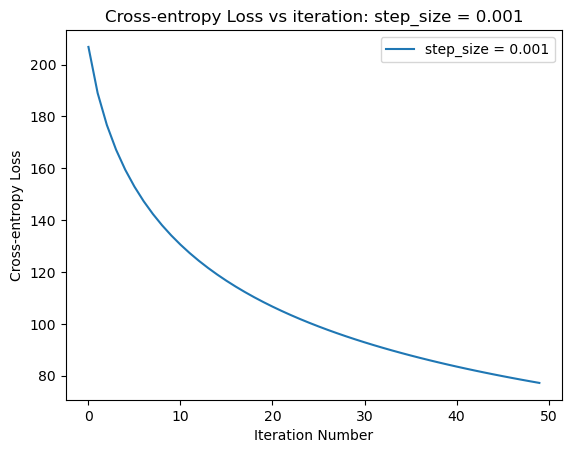

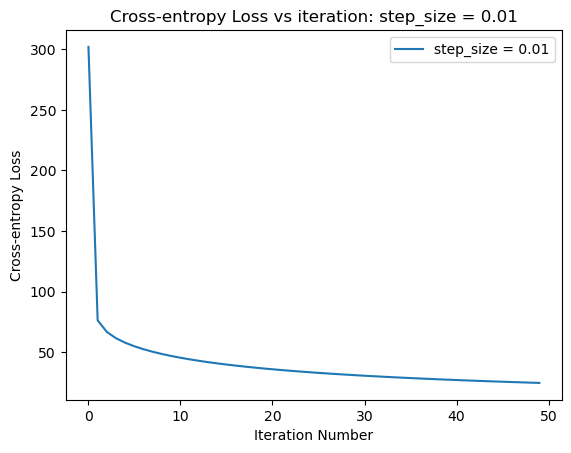

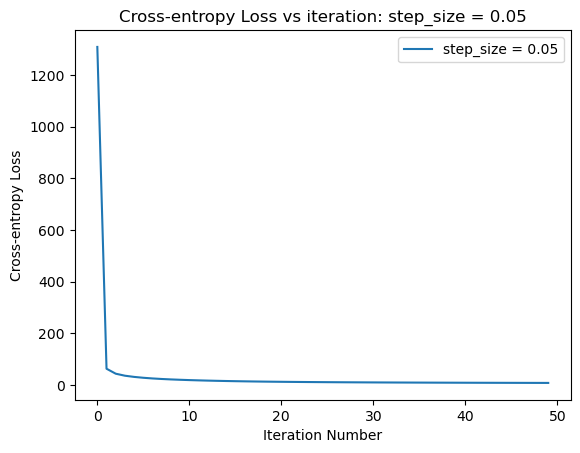

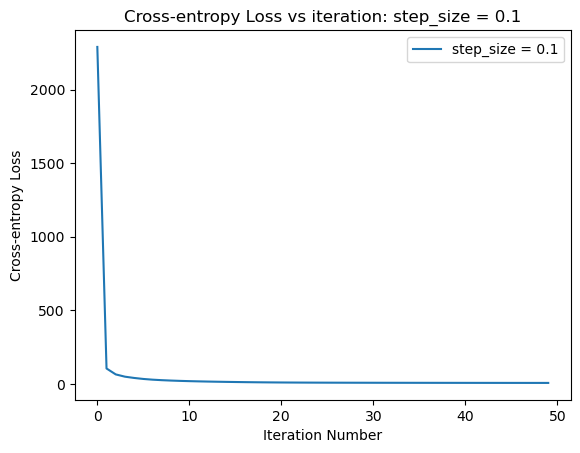

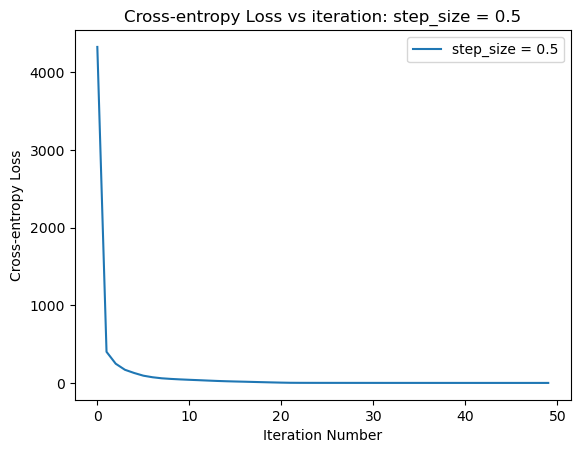

In [17]:
import matplotlib.pyplot as plt

for i, step_size in enumerate(step_sizes):
    plt.plot(range(len(loss_list[i])), loss_list[i], label=f'step_size = {step_size}')
    plt.xlabel('Iteration Number')
    plt.ylabel('Cross-entropy Loss')
    plt.title(f'Cross-entropy Loss vs iteration: step_size = {step_size}')
    plt.legend() 
    plt.show()


In [18]:
!pip install prettytable

In [19]:
from tabulate import tabulate
data = zip(step_sizes, w_l2_norm)
headers = ["Step Size", "L2 Norm"]
print(tabulate(data, headers=headers, tablefmt="pretty"))


+-----------+--------------------+
| Step Size |      L2 Norm       |
+-----------+--------------------+
|   0.001   | 2.614942439315858  |
|   0.01    | 7.994080767429745  |
|   0.05    | 28.480013818344553 |
|    0.1    | 55.605049373056815 |
|    0.5    | 275.7811630658501  |
+-----------+--------------------+


In [20]:
#Q5.4c

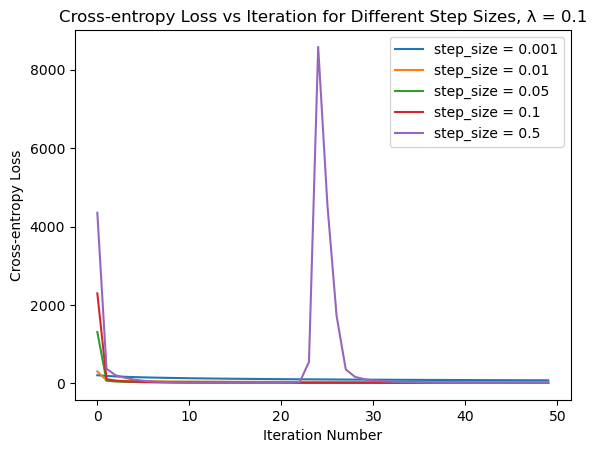

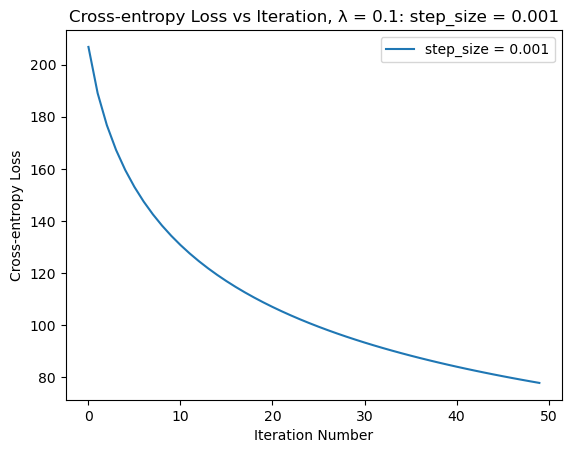

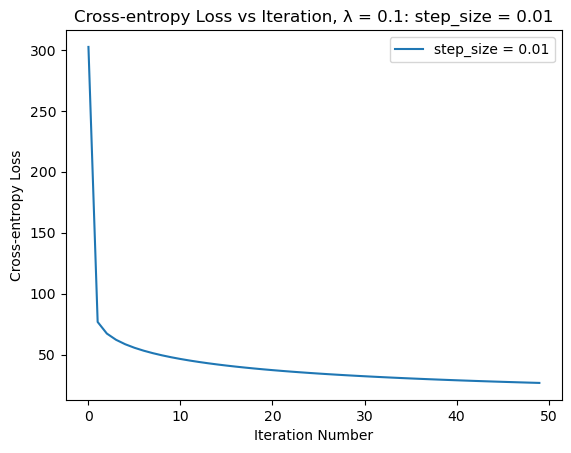

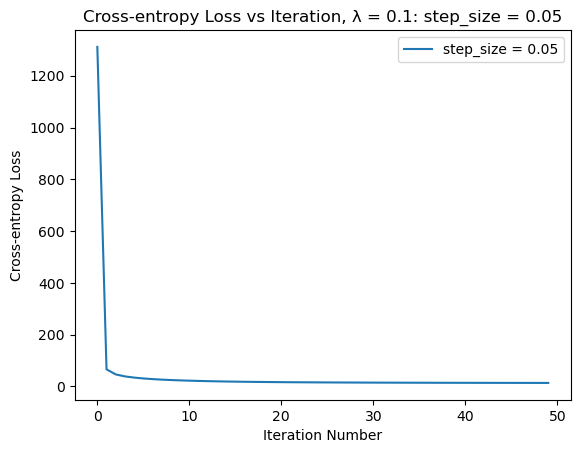

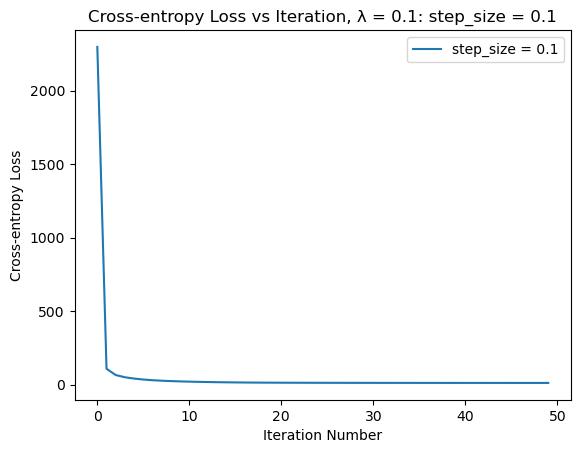

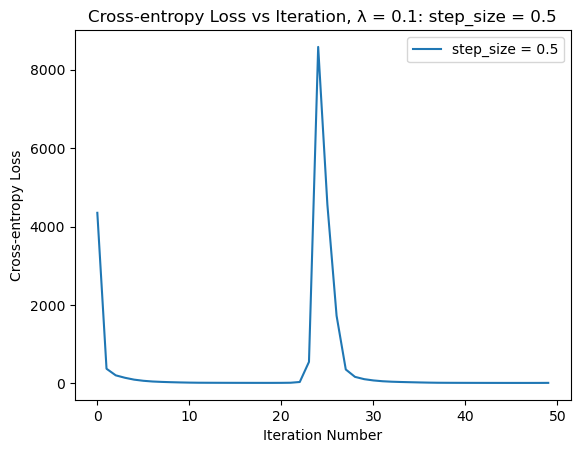

+---------+-------------------+
| Lambdas |   L2 norm of w    |
+---------+-------------------+
|    0    | 7.994080767429745 |
|   0.1   | 7.49510495220822  |
|   0.2   | 7.049740013478144 |
|   0.3   | 6.652626735703954 |
|   0.4   | 6.298793303549443 |
|   0.5   | 5.983635826450085 |
+---------+-------------------+


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import math

w = np.zeros(d)
b = 0.1
num_inter = 51
step_sizes = [0.001,0.01,0.05,0.1,0.5]
λ = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
lambda_one = 0.1

# fix lambda to 0.1, iterate through step sizes
loss_list_1 = []
for step in step_sizes:
    loss_temp, w_temp = with_regularization(num_inter,w,X,b,step, lambda_one)
    loss_list_1.append(loss_temp)

for i in range(len(loss_list_1)):
    loss_list_1[i].pop(0)

# Plot all the loss curves in a single plot differentiated by step_size
for i, step_size in enumerate(step_sizes):
    plt.plot(range(len(loss_list_1[i])), loss_list_1[i], label=f'step_size = {step_size}')
plt.xlabel('Iteration Number')
plt.ylabel('Cross-entropy Loss')
plt.title(f'Cross-entropy Loss vs Iteration for Different Step Sizes, λ = 0.1')
plt.legend()
plt.show()

# Individual plots
for i, step_size in enumerate(step_sizes):
    plt.plot(range(len(loss_list_1[i])), loss_list_1[i], label=f'step_size = {step_size}')
    plt.xlabel('Iteration Number')
    plt.ylabel('Cross-entropy Loss')
    plt.title(f'Cross-entropy Loss vs Iteration, λ = 0.1: step_size = {step_size}')
    plt.legend()
    plt.show()

# fix step size to 0.01, iterate through lambdas
w_list = []
step_size_one = 0.01
for lam in λ:
    _, w_temp_1 = with_regularization(num_inter,w,X,b,step_size_one, lam)
    w_list.append(math.sqrt(w_temp_1))

data = zip(λ, w_list)
headers = ["Lambdas", "L2 norm of w"]
print(tabulate(data, headers=headers, tablefmt="pretty"))
